## Customer Financial Profile Analysis

## Introduction

Every financial decision tells a story. From how many credit cards a person owns to the debt they carry, these choices shape not just individual financial health but also broader market trends.

In this analysis, I set out to explore key aspects of customer financial behavior using two datasets—one containing user demographics and another detailing credit card ownership. By merging and analyzing these datasets, I aimed to answer crucial questions:

### Objectives
1. **Who are the customers?** Understanding their **age distribution, gender ratio, and income levels** to get a clear picture of demographics.
2. **How many credit cards do users have?** Identifying single vs. multiple cardholders and assessing patterns in credit ownership.
3. **Who is at risk?** Evaluating **customers with high debt relative to their income** to pinpoint financial vulnerabilities.
4. **Which cards are about to expire?** Determining the number of **credit cards set to expire within the next year** and their potential impact.
5. **Who should be targeted for marketing?** Analyzing **credit scores, income, and card types** to provide insights into which customer segments are most suitable for financial product campaigns.

This study is more than just numbers—it’s about understanding financial behavior, identifying risks, and uncovering opportunities. Let’s break down the findings.


In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overview

In this section, we explore the structure, completeness, and basic characteristics of our datasets. The two datasets provided are:

1. **users_data**: Contains demographic and financial information of customers, including their income, debt, and credit score.
2. **cards_data**: Contains details about customers' credit cards, such as card type, brand, expiration date, and credit limit.

We begin by inspecting the structure and contents of these datasets.


In [2]:
# Loading the csv files
cards_data = pd.read_excel('cards_data.xlsx')
users_data = pd.read_excel('users_data.xlsx')
display(cards_data.head(), users_data.head())

# Check dataset shape
print("Users Data Shape:", users_data.shape)
print("Cards Data Shape:", cards_data.shape)

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,4524,825,Visa,Debit,4344676511950440,2022-12-01,623,YES,2,24295,2002-09-01,2008
1,2731,825,Visa,Debit,4956965974959980,2020-12-01,393,YES,2,21968,2014-04-01,2014
2,3701,825,Visa,Debit,4582313478255490,2024-02-01,719,YES,2,46414,2003-07-01,2004
3,42,825,Visa,Credit,4879494103069050,2024-08-01,693,NO,1,12400,2003-01-01,2012
4,4659,825,Mastercard,Debit (Prepaid),5722874738736010,2009-03-01,75,YES,1,28,2008-09-01,2009


,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


Users Data Shape: (2000, 14)
Cards Data Shape: (6146, 12)


In [3]:
# Check data types and missing values
users_data.info()
cards_data.info()

# Count missing values
print("Missing values in users_data:\n", users_data.isnull().sum())
print("\nMissing values in cards_data:\n", cards_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_id            2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   object 
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 218.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entri

### Data Types and Missing Values  

To assess data completeness, we check for missing values and inspect the data types of each column.  

#### **Findings:**  
- No missing values were found in either dataset.
- Data types appear consistent with expectations, but further validation is necessary to ensure accuracy.

The dataset has no missing values but diving deeper i notice some kind of values that aren't suppose to be there, i think i'll work on data validating

In [4]:
# Data validation

# Checking the uniqueness of latitude data
lat_unique = users_data['latitude'].unique()

# Changing the datatime values in the latitude data to a NaN 
users_data['latitude'] = pd.to_numeric(users_data['latitude'], errors = 'coerce')

# Changing from object to float in the latitude column in the user_data
users_data['latitude'].astype(float)

# Checking for unrealistic ages
print("Customers with age below 18 or above 100:")
display(users_data[(users_data['current_age'] < 18) | (users_data['current_age'] > 100)])

# Checking the values
users_data.isna().sum()

Customers with age below 18 or above 100:


,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
300,1424,101,68,1918,5,Female,887 Third Boulevard,35.13,-112.99,13086,15348,1396,761,4


main_id               0
current_age           0
retirement_age        0
birth_year            0
birth_month           0
gender                0
address               0
latitude             45
longitude             0
per_capita_income     0
yearly_income         0
total_debt            0
credit_score          0
num_credit_cards      0
dtype: int64

### Data Validation  
While checking for missing values, we also performed data validation to ensure the dataset is clean and consistent.  

#### **Findings:**  
- The `latitude` column contained some datetime values instead of numerical coordinates.  
  - This issue likely occurred during data import, where latitude values were misinterpreted as datetime.  
  - As a result, converting the `latitude` column from an object to a float was not possible until the invalid entries were handled.  

- An anomaly was found in the **current_age** column, where one customer was recorded as **101 years old** (born in 1918).  
  - While unusual, this is **not necessarily an error**, as it is possible for a customer to be this old.  
  - Given that this is the only case out of **2000 records**, and the other financial details of this customer appear reasonable, no correction was made.  

#### **Resolution Approach:**  
- Identified unique values in the `latitude` column to detect anomalies.  
- Converted non-numeric values (datetime errors) in the `latitude` column to **NaN** for cleaning.  
- Changed the `latitude` column from object to float for proper analysis.  
- Rechecked for missing values after conversion.  
- Investigated **age anomalies**, determined that the **101-year-old** entry is plausible, and documented it instead of modifying the data.  

This validation ensures the dataset is properly structured before proceeding with further analysis.  



## Merging The Datasets

In [5]:
# Merging the cards_data and the users_data
merged_data = pd.merge(cards_data, 
                       users_data, 
                       left_on = 'client_id', 
                       right_on = 'main_id', 
                       how = 'left'
                      )

# Checking for the card_type of the dataset
merged_data['card_type'] = merged_data['card_type'].replace({'Debit (Prepaid)' : 'Prepaid'}) # renaming the Debit (Prepaid) to Prepaid.

merged_data.isnull().sum()

card_id                    0
client_id                  0
card_brand                 0
card_type                  0
card_number                0
expires                    0
cvv                        0
has_chip                   0
num_cards_issued           0
credit_limit               0
acct_open_date             0
year_pin_last_changed      0
main_id                    0
current_age                0
retirement_age             0
birth_year                 0
birth_month                0
gender                     0
address                    0
latitude                 139
longitude                  0
per_capita_income          0
yearly_income              0
total_debt                 0
credit_score               0
num_credit_cards           0
dtype: int64

### Data Merging Process

To conduct a comprehensive analysis, we merged the two datasets using a **left join** on `users_data.main_id = cards_data.client_id`. 

This ensures that:
- All users remain in the dataset, even if they do not have credit cards.
- We can analyze financial health and credit card usage together.

Above is a sample of the merged dataset.

### Cleaning `card_type` Column

The `card_type` column originally contained three unique values:  
- **Debit**  
- **Credit**  
- **Debit (Prepaid)**  

The last category, **"Debit (Prepaid)"**, seemed redundant and inconsistent with the naming pattern.  
To improve clarity, we renamed it to **"Prepaid"** for uniformity in analysis.  

### Handling Missing Values  

I believe that removing the NaN values at this stage isn’t the best approach.  
Since these NaN values appeared due to merging both datasets, it would be more appropriate to handle them later.  
For now, I plan to complete the necessary analysis before deciding how to address them properly.


## Customer Demographics

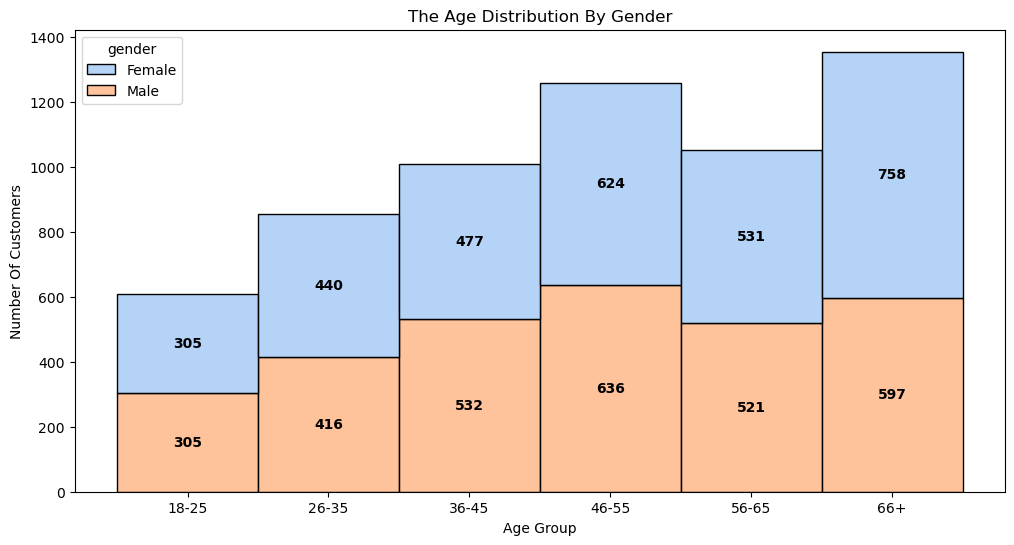

In [6]:
# What is the age distribution, gender ratio, and income distribution of the customers

# Step 1: age distribution
age_bin = [18, 25, 35, 45, 55, 65, 100]
age_label = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
merged_data['age_group'] = pd.cut(merged_data['current_age'], 
                                  bins = age_bin, 
                                  labels = age_label,
                                  right = False
                                 )

# Visualizing the age distribution
plt.figure(figsize = (12, 6))
ax = sns.histplot(x = 'age_group',
             hue = 'gender',
             multiple = 'stack',
             data = merged_data,
             alpha = 0.8,
             palette = 'pastel'
            )
plt.title('The Age Distribution By Gender')
plt.xlabel('Age Group')
plt.ylabel('Number Of Customers')

# Annotate the bars with counts
for p in ax.patches:
    if p.get_height() > 0:  # Avoid labeling zero-height bars
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, 
                     p.get_y() + p.get_height() / 2), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    fontweight='bold', 
                    color='black')

plt.show()

## Customer Demographics  

### Age Distribution By Gender  

The age distribution of customers provides insights into the primary age groups using the financial services.  

- The majority of customers fall within the **36-45** and **46-55** age groups, suggesting that middle-aged individuals form the core customer base.  
- The number of customers increases with age, peaking in the **66+** age group.  
- Across all age groups, **female customers outnumber male customers**, particularly in the **46-55** and **66+** age brackets.  
- The **18-25 age group** has the lowest representation, indicating that younger individuals are less engaged with the company's financial products.  


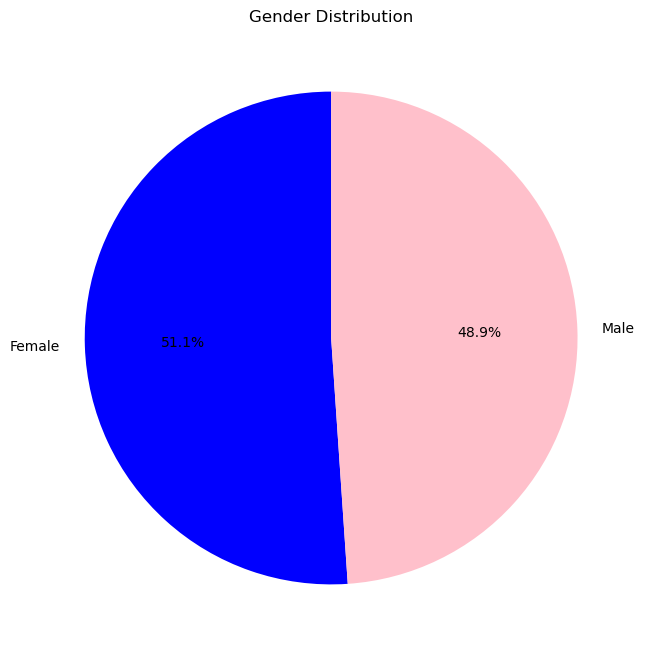

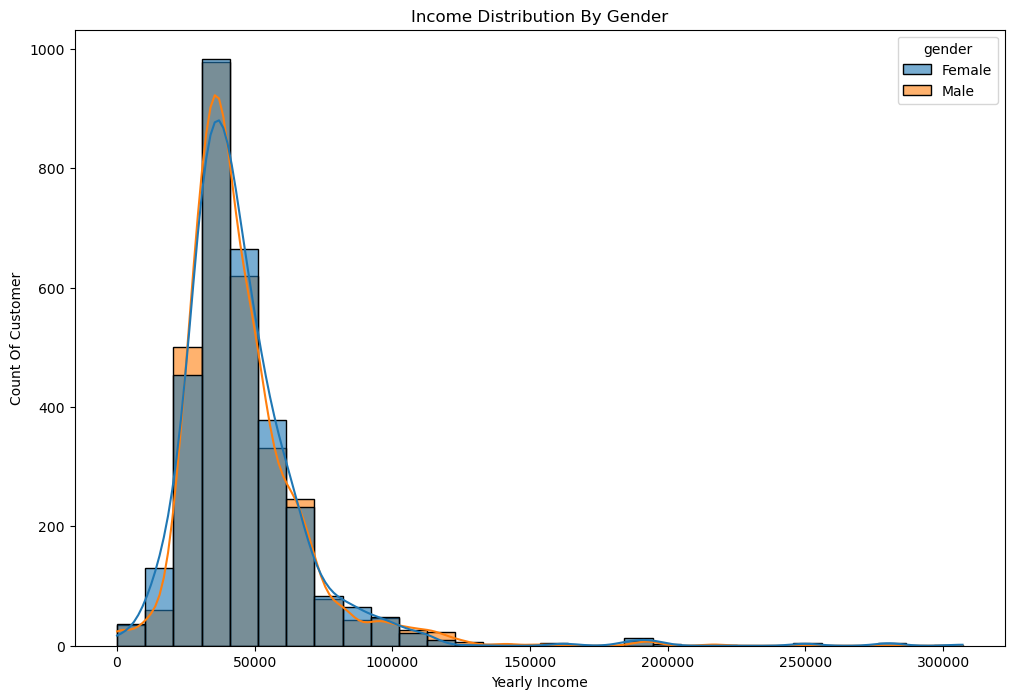

In [7]:
# Step 2: Visualizing the Gender ratio
plt.figure(figsize = (12, 8))
plt.pie(merged_data['gender'].value_counts(),
        labels = merged_data['gender'].value_counts().index,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = ['blue', 'pink']
       )
plt.title('Gender Distribution')
plt.show()


# Step 3: Income Distribution Of The Customers
yearly_bin = [0, 50000, 100000, 200000, 400000]
yearly_label = ['lower', 'middle', 'upper middle', 'higher']
merged_data['income_category'] = pd.cut(merged_data['yearly_income'], 
                                     bins = yearly_bin,
                                     labels = yearly_label,
                                     right = False
                                    )
# Visualizing the income
plt.figure(figsize = (12, 8))
sns.histplot(data = merged_data,
             x = 'yearly_income',
             bins = 30,
             hue = 'gender',
             kde = True,
             alpha = 0.6
            )
plt.title('Income Distribution By Gender')
plt.xlabel('Yearly Income')
plt.ylabel('Count Of Customer')
plt.show()

## This histogram shows customer income distribution by gender:

Most customers earn $30,000–$50,000.
Right-skewed: Few high earners ($100K+).

Males & females have similar distributions.

KDE line confirms income concentration below $60K.

## Credit Card Ownership:

Number of credit cards that a 'average user have': 3.94500488122356


,main_id,num_credit_cards
441,797,9
1015,1741,9
755,1301,9
190,343,8
362,665,8
781,1345,8
871,1492,8
588,1031,8
836,1425,8
13,27,8


,num_credit_cards,count
0,4,1504
1,3,1347
2,5,1030
3,2,776
4,6,630
5,1,416
6,7,280
7,8,136
8,9,27


Number of outliers in 'yearly_income': 340


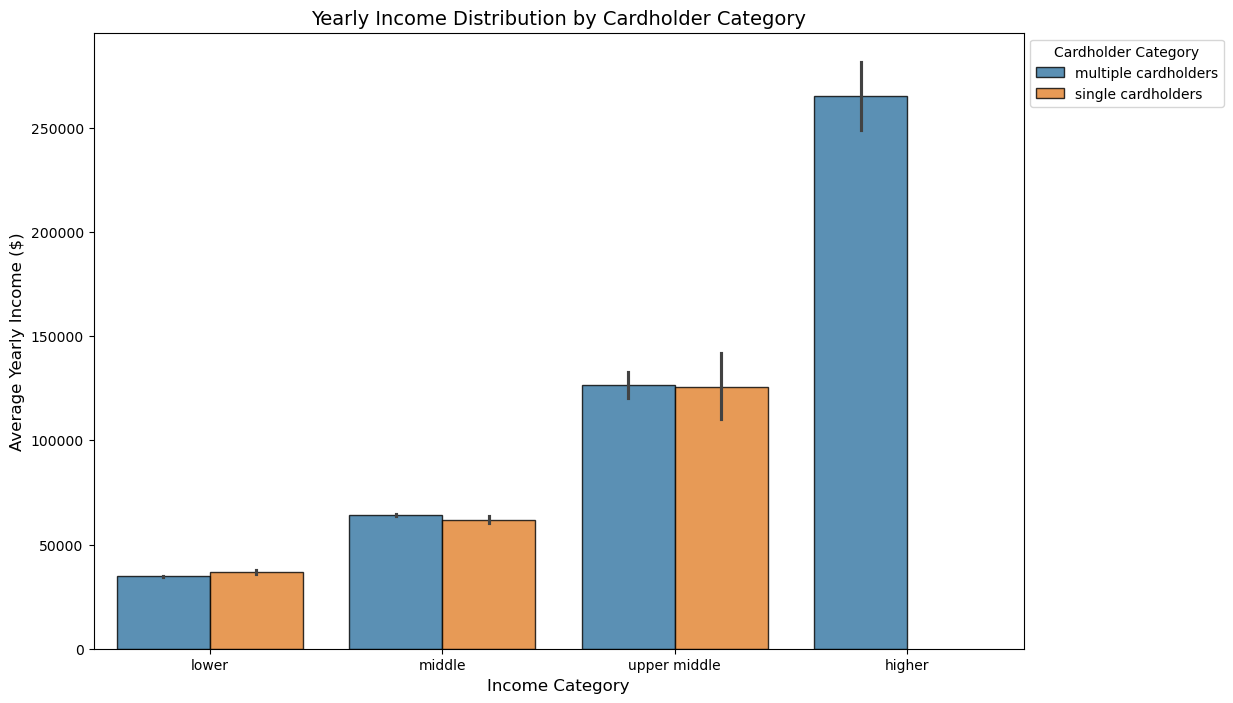

In [8]:
# Step 1: How many credit cards does the average user have?
avg_credit_users = merged_data['num_credit_cards'].mean()
print(f"Number of credit cards that a 'average user have': {avg_credit_users}")


# Step 2: Identify customers with multiple credit cards.
credit_cards = merged_data[merged_data['card_type'] == 'Credit']
total_credit_cards = credit_cards.groupby('main_id')['num_credit_cards'].max()
multiple_credit_cards = total_credit_cards[total_credit_cards > 1].reset_index()

# Top 10 customer wih multiple cards
top_customers = multiple_credit_cards.sort_values(by = 'num_credit_cards', ascending = False).head(10)
display(top_customers)

# Step 3: How many customers are single and how many are multiple card holders
num_of_holders = merged_data['num_credit_cards'].value_counts()
display(num_of_holders.reset_index())

# Categorizing customers based on the number of credit cards they own.
def categorize_cardholder(num_cards):
    if num_cards == 1:
        return 'single cardholders'
    elif num_cards > 1:
        return 'multiple cardholders'
    else:
        return 'unknown'

# The new category is stored in the 'cardholder_category' column.
merged_data['cardholder_category'] = merged_data['num_credit_cards'].apply(categorize_cardholder)

# Visualizing my findings
plt.figure(figsize=(12, 8))

sns.barplot(data=merged_data, 
            x='income_category',
            y='yearly_income', 
            hue='cardholder_category', 
            alpha=0.8,  
            edgecolor='black'  
           )
plt.title("Yearly Income Distribution by Cardholder Category", fontsize=14)
plt.xlabel("Income Category", fontsize=12)
plt.ylabel("Average Yearly Income ($)", fontsize=12)
plt.legend(title="Cardholder Category", loc='upper left', bbox_to_anchor=(1,1))

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = merged_data['yearly_income'].quantile(0.25)
Q3 = merged_data['yearly_income'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_data[(merged_data['yearly_income'] < lower_bound) | (merged_data['yearly_income'] > upper_bound)]

# Count outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers in 'yearly_income': {num_outliers}")


plt.show()


## Credit Card Ownership and Income Distribution Analysis  

### Step 1: Average Number of Credit Cards per User  
The average number of credit cards a user owns is **3.95** (rounded to two decimal places).  

### Step 2: Analysis of Customers with Multiple Credit Cards  
Some customers own multiple credit cards, with the highest being **9 cards per person**. On average, users have around **4 credit cards**. The top 10 customers with multiple credit cards were identified, and their details were sorted based on the number of cards they own.  

### Step 3: Categorizing Customers Based on Card Ownership  
To understand the distribution of customers based on the number of credit cards they own, we first counted how many customers have single or multiple credit cards. The function `categorize_cardholder()` was used to classify customers into two groups:  

- **Single Cardholders**: Customers who own only one credit card.  
- **Multiple Cardholders**: Customers who own more than one credit card.  

A new column, **cardholder_category**, was created in the dataset to store these classifications.  

### Yearly Income Distribution by Cardholder Category  
The bar chart visualizes the **yearly income distribution** across different income categories while differentiating between **single and multiple cardholders**.  

#### **Key Findings**  
- **Higher-income individuals** tend to have multiple credit cards more frequently than lower-income individuals.  
- In the **lower and middle-income categories**, there is little difference in yearly income between single and multiple cardholders.  
- The **upper middle-income group** exhibits a similar income range for both cardholder categories, suggesting that income alone may not determine the number of credit cards owned.  
- The **higher-income category** shows a significant income increase, where multiple cardholders dominate, implying that wealthier individuals may have better access to multiple credit cards.
- Outlier Detection: An outlier of 340k yearly income was identified, mainly from the higher-income group. This extreme value highlights the presence of a few exceptionally high earners who significantly impact the distribution. Since this represents real-world variations, the outlier was left in the dataset rather than removed.

### **Conclusion**  
The findings suggest a potential correlation between **income level** and **credit card ownership**. Higher-income individuals are more likely to have multiple credit cards, while lower-income individuals tend to have just one. Further analysis could explore other factors such as **credit score, spending habits, or debt levels** to better understand these trends.  


## Credit Risk Analysis

In [9]:
# Identify customers with high total debt compared to their yearly income

# Step 1: Counting the amount of each debt that appears each time on the dataset
debt = merged_data['total_debt'].value_counts().reset_index()
#display(debt.head(10))

# Step 2: Customer that has a high Debt-to-Income (DTI) ratio
merged_data['debt_to_income'] = merged_data['total_debt'] / merged_data['yearly_income']

# Categorizing the DTI
def categorize_dti(dti_info):
    if dti_info <= 0.2:
        return 'low risk'
    elif 0.2 < dti_info <= 0.4:
        return 'moderate risk'
    elif 0.4 < dti_info <= 0.6:
        return 'high risk'
    else:
        return 'very high risk'

# The new category is stored in the 'dti_category' column.
merged_data['dti_category'] = merged_data['debt_to_income'].apply(categorize_dti)

# Count how many customers fall into each category
dti_counts = merged_data['dti_category'].value_counts()
display(dti_counts)

# Filter customers that are in high or very high risk categories
high_debt_customers = merged_data[merged_data['dti_category'].isin(['high risk', 'very high risk'])]

# Count how many customers have high debt
high_debt_count = len(high_debt_customers)

# Display the result
print(f"Total number of high debt customers: {high_debt_count}")

# Optional: View details of these customers
display(high_debt_customers.head())  # Show first few rows


dti_category
very high risk    4381
low risk          1122
moderate risk      334
high risk          309
Name: count, dtype: int64

Total number of high debt customers: 4690


,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_group,income_category,cardholder_category,debt_to_income,dti_category
0,4524,825,Visa,Debit,4344676511950440,2022-12-01,623,YES,2,24295,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
1,2731,825,Visa,Debit,4956965974959980,2020-12-01,393,YES,2,21968,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
2,3701,825,Visa,Debit,4582313478255490,2024-02-01,719,YES,2,46414,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
3,42,825,Visa,Credit,4879494103069050,2024-08-01,693,NO,1,12400,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
4,4659,825,Mastercard,Prepaid,5722874738736010,2009-03-01,75,YES,1,28,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk


# Identifying High Debt Customers

## Objective  
The goal of this analysis was to identify customers with high total debt compared to their yearly income by calculating their **Debt-to-Income (DTI) ratio** and categorizing them based on risk levels.

## Methodology  
1. **Debt Frequency Analysis:**  
   - Counted occurrences of different total debt values in the dataset.  
2. **Debt-to-Income (DTI) Calculation:**  
   - Computed DTI as **Total Debt / Yearly Income** for each customer.  
3. **Risk Categorization:**  
   - Classified customers based on DTI into four categories:  
     - **Low Risk:** DTI ≤ 0.2  
     - **Moderate Risk:** 0.2 < DTI ≤ 0.4  
     - **High Risk:** 0.4 < DTI ≤ 0.6  
     - **Very High Risk:** DTI > 0.6  
4. **High Debt Customer Identification:**  
   - Filtered customers in the **High Risk** and **Very High Risk** categories.  
   - Counted the total number of customers falling into these categories.  

## Results  
- **DTI Distribution:**  
  - **Very High Risk:** 4381 customers  
  - **High Risk:** 309 customers  
  - **Moderate Risk:** 334 customers  
  - **Low Risk:** 1122 customers  

- **Total High Debt Customers:** **4690**  

## Conclusion  
A significant portion of customers (4690) fall into the **high debt risk** category, with the majority classified as **very high risk**. These customers have a **debt-to-income ratio exceeding 40%**, indicating potential financial instability.


## Card Expiration Analysis

In [10]:
# How many cards will expire within the next year?
 
# Step 1:Define the start and end date for the next year (2025)
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2024-12-31')

# Filter cards that expire within the next year (2025)
expiring_cards = merged_data[(merged_data['expires'] >= start_date) & (merged_data['expires'] <= end_date)]

# Count the number of expiring cards
num_expiring_cards = expiring_cards.shape[0]

# Display the result
print(f"Total number of cards expiring in 2024: {num_expiring_cards}")

# Optional: View first few rows of expiring cards
expiring_cards.head()

Total number of cards expiring in 2024: 962


,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_group,income_category,cardholder_category,debt_to_income,dti_category
2,3701,825,Visa,Debit,4582313478255490,2024-02-01,719,YES,2,46414,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
3,42,825,Visa,Credit,4879494103069050,2024-08-01,693,NO,1,12400,...,29278,59696,127613,787,5,46-55,middle,multiple cardholders,2.137714,very high risk
14,4706,1718,Mastercard,Debit,5191030913182490,2024-06-01,360,YES,1,16055,...,22681,33483,196,698,5,66+,lower,multiple cardholders,0.005854,low risk
32,3880,1752,Mastercard,Debit,5294178176133530,2024-07-01,265,YES,2,9496,...,18730,38190,81262,810,1,26-35,lower,single cardholders,2.127835,very high risk
40,5924,1590,Mastercard,Debit,5548265564669330,2024-12-01,145,YES,2,4147,...,10059,20513,32509,599,1,46-55,lower,single cardholders,1.584800,very high risk


# Card Expiration Analysis

## Objective
The goal of this analysis is to determine how many cards will expire within the next year.

## Methodology
1. Defined the **start date** (`2024-01-01`) and **end date** (`2024-12-31`).
2. Filtered the dataset to include only cards expiring within this date range.
3. Counted the number of such cards.
4. Displayed the first few records of the filtered dataset for verification.

## Results
- **Total number of cards expiring in 2024:** `962`

This analysis provides insight into the number of expiring cards, which can help in planning renewals and notifications.


## Customer Distribution & Density

Mapbox Token Loaded: True


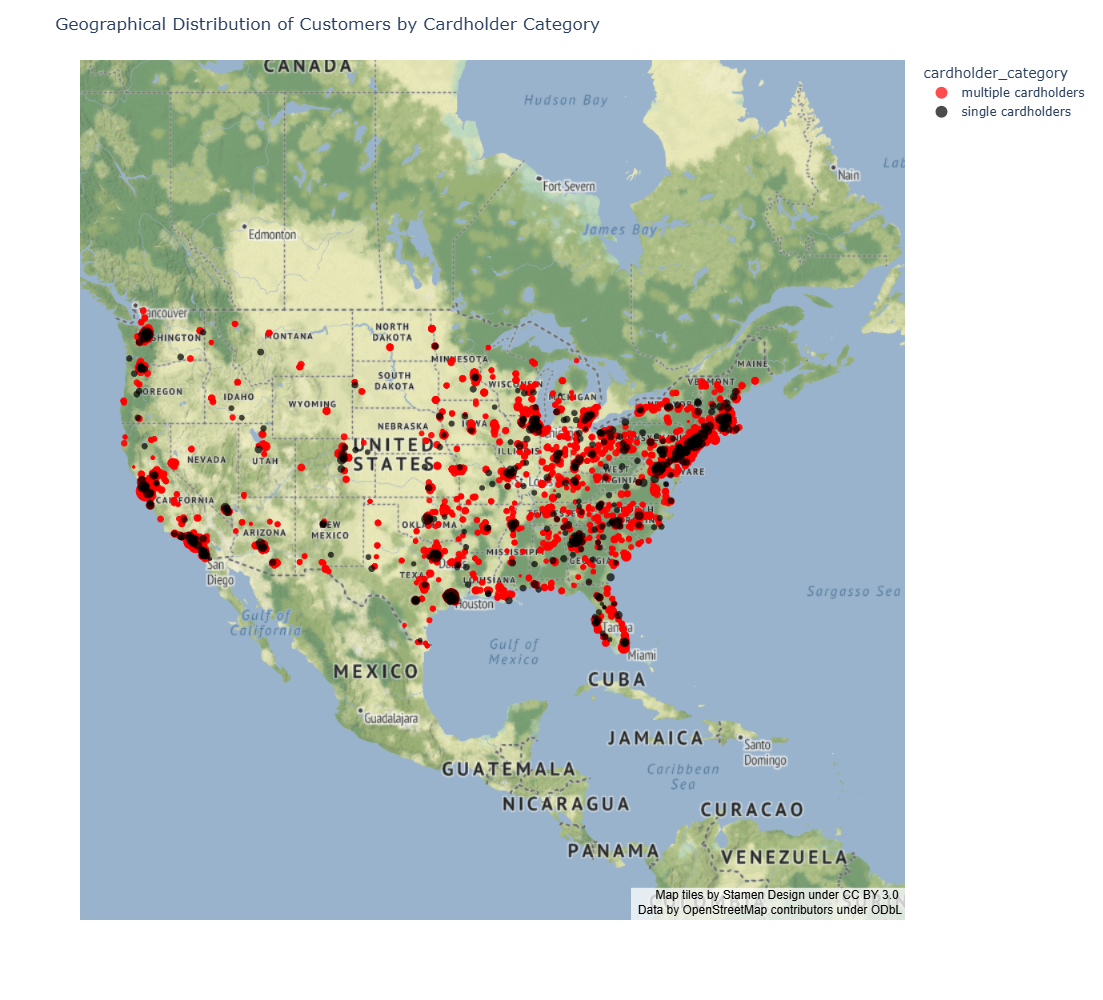

In [18]:
# Where are most of the customers located?
import plotly.express as px
from dotenv import load_dotenv
import os
import pandas as pd  # Ensure pandas is imported

# dropping the NaN values in the latitude
merged_data = merged_data.dropna(subset = ['latitude', 'longitude'])

# Load environment variable from .env 
load_dotenv()
mapbox_token = os.getenv("MAPBOX_ACCESS_TOKEN")
print("Mapbox Token Loaded:", bool(mapbox_token))  # Check if token is loaded

px.set_mapbox_access_token(mapbox_token)

# Creating a plot using Plotly Express
fig = px.scatter_mapbox(
    data_frame=merged_data,
    lat='latitude',
    lon='longitude',
    hover_name='address',
    color='cardholder_category',
    size='yearly_income',
    size_max=15,  # Increased for better visibility
    opacity = 0.7,
    color_discrete_sequence=['red', 'black'],
    zoom=3,  # Adjust zoom level
    center={'lat': merged_data['latitude'].mean(), 'lon': merged_data['longitude'].mean()},
    height=1000,
    width=1000,
    mapbox_style="stamen-terrain"  # Try a different style
)

fig.update_layout(
    title_text="Geographical Distribution of Customers by Cardholder Category",
    mapbox=dict(accesstoken=mapbox_token),  
    dragmode="zoom"  # Enables zooming with touchpad/mouse scroll
)


fig.show()


## Customer Location Analysis

### Where Are Most of the Customers Located?  
The majority of customers are concentrated in the **eastern United States**, with significant clusters in major metropolitan areas. The **West Coast** also shows notable activity, though less dense.

### Observations:  
- **High density** in urban regions, especially in the East.  
- **Moderate presence** on the West Coast.  
- **Sparse distribution** in central and rural areas.  

## Conclusion

The analysis of customer demographics and financial behavior reveals key insights into income distribution, spending patterns, and geographical concentrations. A significant proportion of high-income customers are located in metropolitan areas, while mid-to-low-income customers are more widely dispersed. The debt-to-income ratio analysis further highlights variations in financial stability across different groups.

These findings provide valuable insights for targeted marketing strategies and customer engagement. In the following section, we outline actionable Marketing Insight to optimize outreach and improve financial services based on these insights.


## Marketing Insight

In [13]:
# Provide insight on which group of customers might be idea for targeted marketing campaigns (based on credit scores, income, and card types)

# Step 1: Identifying High-Value Customers
tg_marketing_camp = merged_data[
    (merged_data['income_category'].isin(['higher', 'upper-middle'])) & 
    (merged_data['credit_score'] > 700) & 
    (merged_data['credit_limit'] > 15000)
]
display(tg_marketing_camp[['income_category', 'credit_score', 'credit_limit', 'card_brand', 'card_type']])


# Step 2: Identifying High-Risk Customers
debt_restructuring = merged_data[
    ((merged_data['dti_category'] == 'high risk') | 
     (merged_data['dti_category'] == 'very high risk')) & 
    (merged_data['credit_score'] < 650)
]
display(debt_restructuring[['dti_category', 'credit_score', 'credit_limit', 'income_category']])


,income_category,credit_score,credit_limit,card_brand,card_type
15,higher,722,98100,Visa,Credit
17,higher,722,132439,Visa,Debit
18,higher,722,125723,Visa,Debit
1439,higher,752,88743,Visa,Debit
1440,higher,752,57200,Visa,Credit
1442,higher,752,151223,Mastercard,Debit
1443,higher,752,61100,Visa,Credit
5572,higher,745,89900,Amex,Credit
5573,higher,745,44100,Amex,Credit


,dti_category,credit_score,credit_limit,income_category
35,very high risk,629,26019,lower
40,very high risk,599,4147,lower
75,very high risk,610,9708,lower
76,very high risk,610,12000,lower
77,very high risk,610,11973,lower
...,...,...,...,...
6091,very high risk,614,5600,lower
6092,very high risk,614,12762,lower
6093,very high risk,614,11900,lower
6121,very high risk,596,61,lower


# **Targeted Marketing Analysis**

## **Step 1: Identifying High-Value Customers**  
To determine the ideal customers for a targeted marketing campaign, we focused on **income category** and **credit scores**. The following criteria were used:

- **Income Category:** Customers classified as **higher** or **upper-middle** income.  
- **Credit Score:** Customers with a credit score **above 700**, indicating strong creditworthiness.  

### **Filtered Customer Data Sample**  
The table above showcases a subset of the high-value customers.  

### **Key Observations:**  
- **High-income customers with strong credit scores** are ideal for **premium card offers** and exclusive perks.  
- **Some customers have high income but high credit limits**, which presents an opportunity for **credit limit increases**.  
- **Debit card users with high income** may be encouraged to switch to **credit cards for financial flexibility**.  
- **Multiple cardholders with high spending power** could be targeted for **tiered reward programs**.  

These insights help in segmenting **high-value customers**, forming the foundation for **strategic marketing and financial product recommendations**.  

---

## **Step 2: Identifying High-Risk Customers**  
These customers have **high debt relative to income**, making them **unsuitable for new credit card promotions** but potential candidates for **financial restructuring programs**.  

### **Strategic Approach:**  
- **Debt Restructuring Offer:** Offer lower interest rates and installment payment plans.  
- **Financial Guidance:** Educate customers on budgeting and debt management.  
- **Risk-Based Promotions:** Rather than pushing **new credit products**, focus on **financial stability initiatives** like tailored repayment plans.  
Rather than pushing new **credit products**, focusing on **financial stability** initiatives can improve **trust and retention**.

---

### **Key Insights: Age Distribution By Gender**  
- Marketing strategies could focus more on **middle-aged and older customers**, who make up the largest portion of the user base.  
- The **low engagement of younger customers** (18-25) suggests an opportunity to introduce **youth-friendly financial products** to attract them.  
- Gender-based campaigns could consider the higher representation of **female customers**, tailoring financial solutions to their needs.

---

### Key Insights:  Customer Location Analysis
- Focus on **high-density areas** for targeted marketing.  
- Explore **expansion opportunities** in underserved regions.  


## Thank You  
Thanks for reading! I appreciate your time and insights. Feel free to reach out with any questions or feedback.  
